## Run data pipeline
Returns an aggegrated df to work with

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/10_sec_New/HECTORdataAggregated_20240506142622.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 1087947


In [3]:
#Add feature for 'SpeedChange' 
import pandas as pd

# Assuming df is already loaded and contains the 'datetime' and 'ActualSpeed' columns
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the dataframe by datetime to ensure proper calculation
df = df.sort_values(by='datetime')

# Create the new feature 'SpeedChange' based on 'ActualSpeed'
df['SpeedChange'] = df['ActualSpeed'].diff()

# Display the first few rows to see the new feature
df.head()



,Vdatetime,datetime,BatMaxV,BatMinV,BatSOC,BatTotalCurrent,BatTotalVoltage,CompOnOff,StopOnOff,ThrottlePerc,...,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday,DistanceKM,MotorJoules,EEM,AltChange,SpeedChange
4,2022-08-01 04:04:5,2022-08-01 04:04:59.770,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,0,0,0,0,NaN,0.0,NaN,NaN,NaN
5,2022-08-01 04:05:0,2022-08-01 04:05:09.780,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.001757,0.0,0.0,NaN,0.0
6,2022-08-01 04:05:1,2022-08-01 04:05:19.980,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.001757,0.0,0.0,NaN,0.0
7,2022-08-01 04:05:2,2022-08-01 04:05:29.880,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.001757,0.0,0.0,NaN,0.0
8,2022-08-01 04:05:3,2022-08-01 04:05:39.890,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.001757,0.0,0.0,NaN,0.0


In [4]:
#Check for NANs 
import pandas as pd


nan_counts_df = df.isna().sum()

# Convert to string with no line width limit
nan_counts_str = nan_counts_df.to_string()

print(nan_counts_str)

Vdatetime               0
datetime                0
BatMaxV               143
BatMinV               143
BatSOC                145
BatTotalCurrent    159904
BatTotalVoltage       145
CompOnOff             144
StopOnOff             143
ThrottlePerc          144
BrakePerc             143
Signal                144
TotalDistance         144
FrontAxle          748593
RearAxle1          748592
RearAxle2          748605
CompPower             142
FC2AirFlow            145
FC2Cool               145
FC2Current            144
FC2Volt               145
FC3AirFlow            145
FC3Cool               145
FC3Current            145
FC3Volt               145
FC1AirFlow            145
FC1Cool               145
FC1Current            145
FC1Volt               145
GPSAltitude        859093
GPSLatitude             0
GPSLongitude            0
H2Perc             749195
H2Press               145
H2Temp                144
H2Weight              145
HVACDraw              143
MotorRPM              143
MotorTorque 

In [5]:
len(df)

1087947

In [6]:
#Drop rows where the RCV is not in use
import pandas as pd

# Create a boolean mask with the specified conditions
mask = (df['ThrottlePerc'] == 0) & (df['ActualSpeed'] == 0) & (df['TotalPowerDraw'] == 0) & (df['MotorRPM'] == 0) & (df['CompOnOff'] == 0) & (df['TotalFCPower'] <= 1)

# Drop the rows where the mask is True
df= df[~mask]

# Verify the result
print(f'Number of rows after dropping: {len(df)}')

# Optionally, display the first few rows of the cleaned DataFrame
print(df.head())


Number of rows after dropping: 333354
             Vdatetime                datetime   BatMaxV  BatMinV  BatSOC  \
22  2022-08-01 04:07:5 2022-08-01 04:07:59.860  4151.175  4124.95   100.0   
23  2022-08-01 04:08:0 2022-08-01 04:08:09.900  4144.650  4118.45   100.0   
24  2022-08-01 04:08:1 2022-08-01 04:08:19.880  4141.575  4115.65   100.0   
25  2022-08-01 04:08:2 2022-08-01 04:08:29.870  4122.875  4096.50   100.0   
26  2022-08-01 04:08:3 2022-08-01 04:08:39.850  4139.500  4104.05   100.0   

    BatTotalCurrent  BatTotalVoltage  CompOnOff  StopOnOff  ThrottlePerc  ...  \
22           19.275          653.800        0.0        1.0         238.0  ...   
23           28.650          652.750        0.0        1.0         276.9  ...   
24           31.625          652.200        0.0        1.0         252.6  ...   
25           63.100          648.925        0.0        1.0         344.9  ...   
26           35.750          650.975        0.0        1.0         267.3  ...   

    Is_Satur

## Import utilities
Import custom function

In [7]:
#Copy this cell to every new version of Main
%run "Utilities.ipynb" 

In [8]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#check min/max values and number of rows

min_datetime = df['Vdatetime'].min()
max_datetime = df['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df.shape
print(df.shape)

Minimum datetime: 2022-08-01 04:07:5
Maximum datetime: 2023-08-01 11:16:5
(333354, 62)


In [10]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


               Data Types                  Statistics              \
                        0                    datetime     BatMaxV   
Vdatetime          object                         NaN         NaN   
datetime   datetime64[us]                         NaN         NaN   
BatMaxV           float64                         NaN         NaN   
BatMinV           float64                         NaN         NaN   
BatSOC            float64                         NaN         NaN   
...                   ...                         ...         ...   
25%                   NaN  2022-09-09 09:44:12.467500  3663.87500   
50%                   NaN  2022-11-21 08:02:34.905000  3807.35000   
75%                   NaN  2023-03-28 06:50:37.437500  3940.42500   
max                   NaN  2023-08-01 11:16:59.830000  4179.80000   
std                   NaN                         NaN  1227.87497   

                                                                             \
               BatMinV 

In [11]:
 # Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
Vdatetime           0
datetime            0
BatMaxV           143
BatMinV           143
BatSOC            145
                ...  
DistanceKM        519
MotorJoules       146
EEM             10641
AltChange      193536
SpeedChange       143
Length: 62, dtype: int64

Heeft DataFrame NaN-waarden?
True

Totaal aantal NaN-waarden in DataFrame:
645566


In [12]:
import pandas as pd

# Assuming df is your DataFrame

# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')

Number of rows with NaN values: 197095
Columns with NaN values: ['BatMaxV', 'BatMinV', 'BatSOC', 'BatTotalCurrent', 'BatTotalVoltage', 'CompOnOff', 'StopOnOff', 'ThrottlePerc', 'BrakePerc', 'Signal', 'TotalDistance', 'FrontAxle', 'RearAxle1', 'RearAxle2', 'CompPower', 'FC2AirFlow', 'FC2Cool', 'FC2Current', 'FC2Volt', 'FC3AirFlow', 'FC3Cool', 'FC3Current', 'FC3Volt', 'FC1AirFlow', 'FC1Cool', 'FC1Current', 'FC1Volt', 'GPSAltitude', 'H2Perc', 'H2Press', 'H2Temp', 'H2Weight', 'HVACDraw', 'MotorRPM', 'MotorTorque', 'MotorUseCurrent', 'BattOutputPower', 'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'TotalAxle', 'NetWeight', 'DistanceKM', 'MotorJoules', 'EEM', 'AltChange', 'SpeedChange']


In [13]:
#JoeCode , fill NANs and drop remining rows
# Replace NaNs in the column 'AltChange ' with 0
df['AltChange'] = df['AltChange'].fillna(0)
df['GPSAltitude'] = df['GPSAltitude'].fillna(0)

# Fill 'the following features  with the last known value
columns_last_known = ['NetWeight', 'TotalAxle', 'FrontAxle', 'RearAxle1', 'RearAxle2', 'DistanceKM','CompOnOff','StopOnOff','Signal','GPSAltitude']
df[columns_last_known] = df[columns_last_known].fillna(method='ffill')

# Fill 'the follwoing features  with average of previous last known and preceding first known values
def fill_with_avg(df, column):
    # Get the series where NaNs are located
    nan_indices = df[column].isna()
    
    # Calculate rolling average before and after NaN values
    forward_fill = df[column].fillna(method='ffill')
    backward_fill = df[column].fillna(method='bfill')
    
    # Calculate average of forward and backward fill values
    df[column] = np.where(nan_indices, (forward_fill + backward_fill) / 2, df[column])

columns_avg = ['BatMaxV', 'BatMinV', 'BatSOC', 'BatTotalCurrent', 'BatTotalVoltage','ThrottlePerc', 'BrakePerc',  'TotalDistance', 'CompPower',
                'FC2AirFlow', 'FC2Cool', 'FC2Current', 'FC2Volt', 'FC3AirFlow', 'FC3Cool', 'FC3Current', 'FC3Volt', 'FC1AirFlow', 'FC1Cool', 'FC1Current',
                  'FC1Volt', 'H2Perc', 'H2Press', 'H2Temp', 'H2Weight', 'HVACDraw', 'MotorRPM', 'MotorTorque', 'MotorUseCurrent', 'BattOutputPower',
                    'MotorPowerDraw', 'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'MotorJoules', 'EEM', 'SpeedChange']
for column in columns_avg:
    fill_with_avg(df, column)

# Drop all other rows containing NaNs
#df.dropna(inplace=True)

# Print the updated DataFrame to verify changes
print(df)


/tmp/ipykernel_1728/2770140184.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_last_known] = df[columns_last_known].fillna(method='ffill')
/tmp/ipykernel_1728/2770140184.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill = df[column].fillna(method='ffill')
/tmp/ipykernel_1728/2770140184.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill = df[column].fillna(method='bfill')


                  Vdatetime                datetime   BatMaxV   BatMinV  \
22       2022-08-01 04:07:5 2022-08-01 04:07:59.860  4151.175  4124.950   
23       2022-08-01 04:08:0 2022-08-01 04:08:09.900  4144.650  4118.450   
24       2022-08-01 04:08:1 2022-08-01 04:08:19.880  4141.575  4115.650   
25       2022-08-01 04:08:2 2022-08-01 04:08:29.870  4122.875  4096.500   
26       2022-08-01 04:08:3 2022-08-01 04:08:39.850  4139.500  4104.050   
...                     ...                     ...       ...       ...   
1086233  2023-08-01 11:16:1 2023-08-01 11:16:19.930  3664.575  3621.850   
1086234  2023-08-01 11:16:2 2023-08-01 11:16:29.880  3645.650  3618.125   
1086235  2023-08-01 11:16:3 2023-08-01 11:16:39.830  3647.850  3619.850   
1086236  2023-08-01 11:16:4 2023-08-01 11:16:49.870  3647.125  3620.350   
1086237  2023-08-01 11:16:5 2023-08-01 11:16:59.830  3650.050  3617.225   

         BatSOC  BatTotalCurrent  BatTotalVoltage  CompOnOff  StopOnOff  \
22        100.0         

In [14]:
import pandas as pd

# Assuming df is your DataFrame

# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')


Number of rows with NaN values: 0
Columns with NaN values: []


In [15]:
 #Check again for NANS after dropping NANS
# Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
Vdatetime      0
datetime       0
BatMaxV        0
BatMinV        0
BatSOC         0
              ..
DistanceKM     0
MotorJoules    0
EEM            0
AltChange      0
SpeedChange    0
Length: 62, dtype: int64

Heeft DataFrame NaN-waarden?
False

Totaal aantal NaN-waarden in DataFrame:
0


In [16]:
raise SystemExit("Stopping execution of  DF IMPORT AND DATA PREPARATION.")

SystemExit: Stopping execution of  DF IMPORT AND DATA PREPARATION.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


END OF DF IMPORT

PLOT BASIC FEATURES AGAINST FEATURE FOR ENERGY USE

START MODELING 

                    MAE           MSE           RMSE        R²
Degree 1  151969.218413  8.997786e+10  299963.096816  0.479486
Degree 2  109811.696384  6.554011e+10  256008.019523  0.620769
Degree 3  109382.010455  6.445211e+10  253874.205126  0.627045


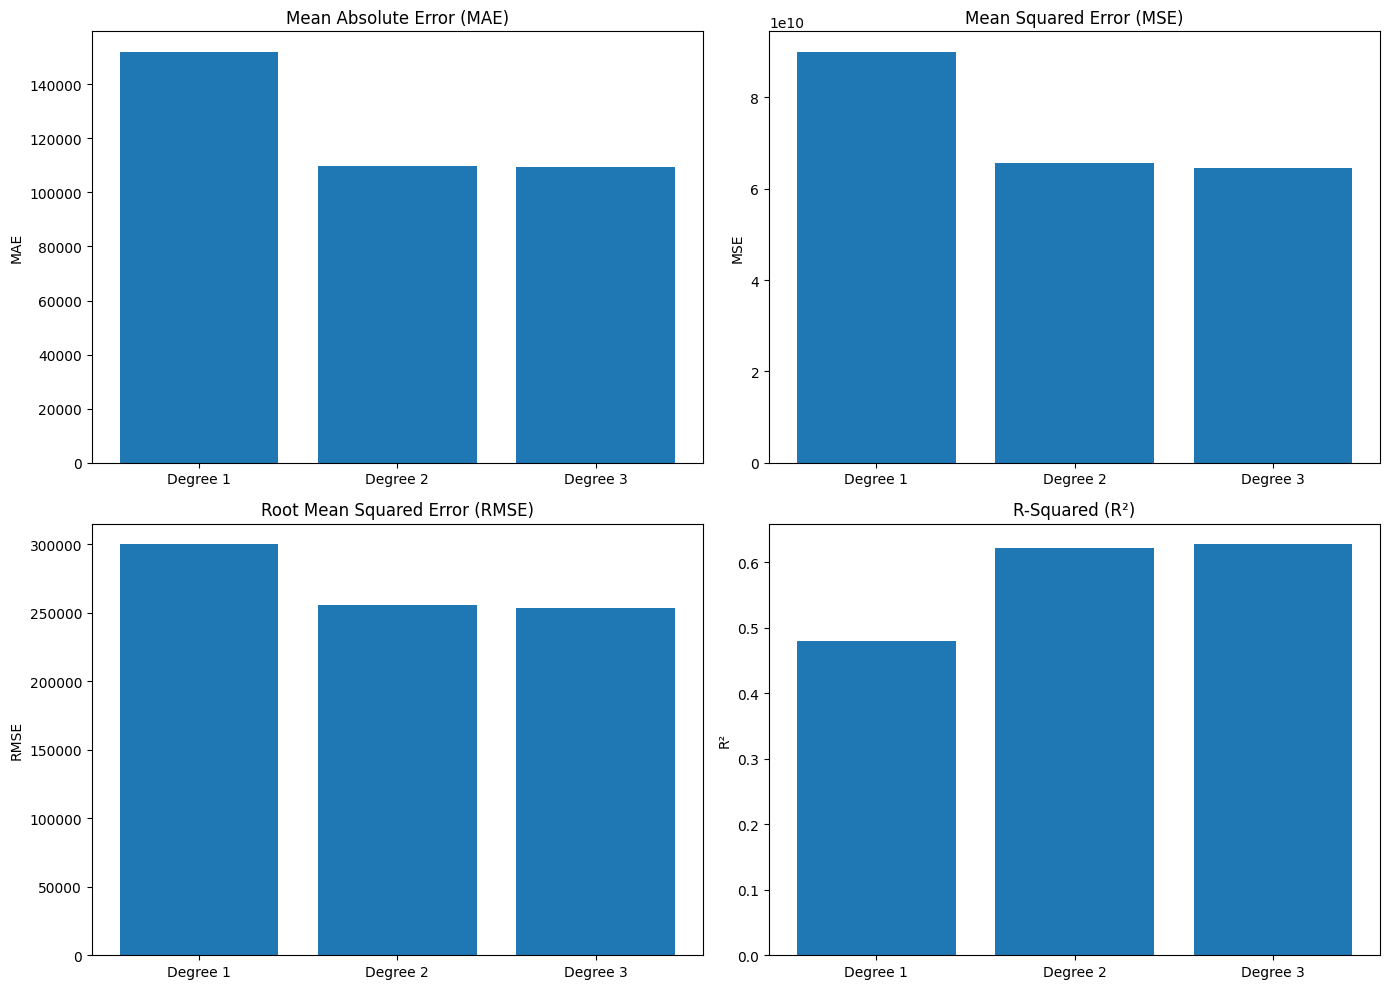

In [17]:
#Polynominal model with all three basic features against target with visualization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to generate polynomial features
def generate_polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Custom scorer for cross-validation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(rmse),
    'R²': make_scorer(r2_score)
}

# Function to evaluate model with cross-validation
def evaluate_model_with_cross_validation(X, y, degree, cv=5):
    X_poly = generate_polynomial_features(X, degree)
    model = LinearRegression()
    mae_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X_poly, y, cv=cv, scoring='r2')
    
    return {
        'MAE': -np.mean(mae_scores),
        'MSE': -np.mean(mse_scores),
        'RMSE': np.sqrt(-np.mean(mse_scores)),
        'R²': np.mean(r2_scores)
    }

# Evaluate models with different polynomial degrees
results = {}
for degree in [1, 2, 3]:
    results[f'Degree {degree}'] = evaluate_model_with_cross_validation(X_train, y_train, degree)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')

plt.tight_layout()
plt.show()


STOP BASIC MODELING

In [18]:
raise SystemExit("Stopping execution of BASIC MODELING.")

SystemExit: Stopping execution of BASIC MODELING.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
len(df)

333354

DEFINITIE POLYNOMINAL MODEL

In [19]:
#cross validation with parallell processing

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt

# Define features and target
features = ['ActualSpeed', 'NetWeight', 'SpeedChange', 'MotorTorque', 'ThrottlePerc', 'FrontAxle', 'RearAxle2', 'RearAxle1', 'BrakePerc']
target = 'MotorJoules'

# Split data into features and target
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Define custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))),
    'R²': make_scorer(r2_score)
}

# Function to perform cross-validation and collect results
def cross_validate_models(models, X, y, scoring, cv=3):
    results = {}
    for name, model in models.items():
        print(f'Cross-validating {name}...')
        scores = {metric: cross_val_score(model, X, y, cv=cv, scoring=scorer, n_jobs=-1) for metric, scorer in scoring.items()}
        results[name] = {metric: np.mean(score) for metric, score in scores.items()}
    return results

# Perform cross-validation
results = cross_validate_models(models, X_train_scaled, y_train, scoring)

# Display results
df_results = pd.DataFrame(results).T
print(df_results)

# Save results to CSV
df_results.to_csv('model_comparison_cross_validation.csv', index=True)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# MAE plot
axes[0, 0].bar(df_results.index, df_results['MAE'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

# MSE plot
axes[0, 1].bar(df_results.index, df_results['MSE'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# RMSE plot
axes[1, 0].bar(df_results.index, df_results['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# R² plot
axes[1, 1].bar(df_results.index, df_results['R²'])
axes[1, 1].set_title('R-Squared (R²)')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Cross-validating Linear Regression...
Cross-validating Gradient Boosting Regressor...
Cross-validating Random Forest Regressor...


: 

In [ ]:
# Save results to CSV
df_results.to_csv('model_crossval.csv', index=True)

#This cell is deactiated due to runtime 
#pairplot to check if variables with high correlation  can be dropped-


sns.pairplot(df, hue='EEM')
plt.show()



In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate the correlation between 'AMotorJoule' and 'MotorTorque'
correlation = df['MotorJoules'].corr(df['MotorTorque'])

print(f'Correlation between MotorJoule and MotorTorque: {correlation}')


Correlation between MotorJoule and MotorTorque: 0.7352681216314413


#check for other features with possible high correlation

import pandas as pd


# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation1 = df['TotalPowerDraw'].corr(df['MotorPowerDraw'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation2= df['BattOutputPower'].corr(df['BatTotalVoltage'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation3= df['BattOutputPower'].corr(df['BatTotalCurrent'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation4= df['TotalPowerDraw'].corr(df['EEM'])

# Calculate the correlation between 'TotalPowerDraw' and 'MotorPowerDraw'
correlation5= df['NetWeight'].corr(df['EEM'])

# Calculate the correlation between 'DistanceKM' and 'MotorPowerDraw'
correlation6= df['DistanceKM'].corr(df['EEM'])

# Print the correlation value
print("Correlation between TotalPowerDraw and MotorPowerDraw:", correlation1)
print("Correlation between BattOutputPower and BatTotalVoltage:", correlation2)
print("Correlation between BattOutputPower and BatTotalCurrent:", correlation3)
print("Correlation between TotalPowerDraw and EEM:", correlation4)
print("Correlation between NetWeight and EEM:", correlation5)
print("Correlation between DistanceKM and EEM:", correlation6)



In [ ]:
#Joecode, check number of NANs before splitting train and test set
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_df = df.isna().sum()

pd.set_option('display.max_columns', None)
# Print the count of NaNs for each column
print(nan_counts_df)


Vdatetime            0
datetime             0
BatMaxV            143
BatMinV            143
BatSOC             145
                 ...  
Is_Wednesday         0
DistanceKM         518
MotorJoules        146
EEM              10317
AltChange       192263
Length: 61, dtype: int64


In [ ]:
#Joecode, check how many rows will be dropped if dropping rows with NANAs in EEM
nan_counts_eem = df['EEM'].isna().sum()

print(f"Number of NaNs in 'EEM' column: {nan_counts_eem}")

Number of NaNs in 'EEM' column: 10317


In [ ]:
#JoeCode remove the rows with NANs that has NANS in target EMM
df = df.dropna(subset=['EEM'])

In [ ]:
#Joecode, check number of NANs before splitting train and test set
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_df = df.isna().sum()
df_rows_train_test=len(df)

pd.set_option('display.max_columns', None)
# Print the count of NaNs for each column
print(f'number of NANS: {nan_counts_df}')
print(f'Number of rows in test and trainset: {df_rows_train_test}')

number of NANS: Vdatetime       0
datetime        0
BatMaxV         0
BatMinV         0
BatSOC          0
               ..
Is_Wednesday    0
DistanceKM      0
MotorJoules     0
EEM             0
AltChange       0
Length: 61, dtype: int64
Number of rows in test and trainset: 171135


In [ ]:
raise SystemExit("Stopping execution of Preprocessing  at this cell.")

SystemExit: Stopping execution of Preprocessing  at this cell.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:


#Check correlation between features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is predefined and is a DataFrame
feature_names = df.columns.tolist()

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Step 2: Identify pairs of highly correlated features (threshold > 0.9)
threshold = 0.9
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Step 3: Create a DataFrame with high correlation pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df_sorted = high_corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Step 4: Create a simplified heatmap
simplified_corr_matrix = corr_matrix.loc[high_corr_df['Feature 1'].unique(), high_corr_df['Feature 2'].unique()]

plt.figure(figsize=(8, 6))
sns.heatmap(simplified_corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=.5)
plt.title('Simplified Correlation Matrix Heatmap')
plt.show()

# Display the list of high correlation pairs
print("Highly correlated pairs of features (threshold > 0.9):")
print(high_corr_df_sorted)


ValueError: could not convert string to float: '2022-08-01 04:08:0'

In [ ]:
#Select the varaibles to inlcude in the test and trainset X set and separate the target y fort test and train
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Target variable: Since 'EEM'='MotorJoules' /() 'NetWeight' * 'DistanceKM') is the target ,we need to drop all features used to construct EEM
#Motorjoules is dropped (original feature "MotorJoules based on 'MotorPowerDraw')
    #Drop 'MotorPowerDraw'
#NetWeight is dropped (original feature "TotalAxle")
    #Drop  'TotalAxle'
#TotalDistance is dropped (original feature "TotalDistance")

#Features with high correlation between themselves and similair correlation with the target varianle EEM are dropped, only one is kept
    #BatMaxV is dropped, BatSOC is kept 
    #RearAxle1 is dropped, TotalAxle is kept (but will be dropped due to its inclusion in the target variable EMM )
    #FC2Cool,FC3Cool, FC2Volt, FC3Volt is dropped, FC1Cool and FC1Volt is kept
    #TotalPowerDraw is dropped, MotorPowerDraw is kept (but will be dropped due to its inclusion in the target variable EMM )
    #BattOutputPower is dropped BatTotalCurrent is kept





# Verwijder niet-noodzakelijke kolommen en splits de data
#Original set for training data 
#X = df.drop(['Vdatetime','EEM','datetime', 'MotorJoules','MotorPowerDraw', 'NetWeight', 'TotalAxle', 'TotalDistance' ,'BatMaxV', 'RearAxle1', 'FC2Cool', 'FC3Cool','FC3Volt', 'FC2Cool' , 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd

#Experimental set for training data-add 'NetWeight','TotalDistance','MotorPowerDraw',
#X = df.drop(['Vdatetime','EEM','datetime', 'MotorJoules', 'TotalAxle', 'BatMaxV', 'RearAxle1', 'FC2Cool', 'FC3Cool','FC3Volt', 'FC2Cool' , 'DayOfWeek','Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'], axis=1)  # Veronderstel dat deze kolommen zijn verwijder
X = df.drop(['EEM', 'TotalAxle', 'NetWeight','DistanceKM', 'MotorJoules','MotorPowerDraw','TotalPowerDraw','FrontAxle', 'RearAxle1', 'RearAxle2','Vdatetime','datetime', 'DayOfWeek','FC2Current', 'FC3Current', 'BatMinV', 'BatMaxV', 'BatTotalCurrent', 'FC2AirFlow', 'FC3AirFlow' , 'FC3Volt'  , 'FC1Current', 'FC2Current' , 'FC3Current', 'H2Press' , 'H2Press', 'FC2Cool', 'FC3Cool', 'H2Perc' ], axis=1)  # Veronderstel dat deze kolommen zijn verwijderd
y = df['EEM']
#These values ar enot removed ,'Is_Friday', 'Is_Monday', 'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday'

# Normaliseer de data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

#Drop the colom with high correlation
X = df.drop(['FC2Current', 'FC3Current', 'BatMinV', 'BatMaxV', 'BatTotalCurrent', 'FC2AirFlow', 'FC3AirFlow' , 'FC3Volt'  , 'FC1Current', 'FC2Current' , 'FC3Current', 'H2Press' , 'H2Press', 'FC2Cool', 'FC3Cool', 'H2Perc'], axis=1)


In [ ]:
# Splits de data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#Print the number of rows in X_train and X_test
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])

Number of rows in X_train: 136908
Number of rows in X_test: 34227
Number of rows in y_train: 136908
Number of rows in y_test: 34227


In [ ]:
y
print("Number of rows in y", y.shape[0])

Number of rows in y 171135


In [ ]:
#Check for Nans  before regression
# Count the number of NaNs in each column
nan_counts_X_train = X_train.isna().sum()


# Print the count of NaNs for each column
print(nan_counts_X_train)



BatSOC             0
BatTotalVoltage    0
CompOnOff          0
StopOnOff          0
ThrottlePerc       0
BrakePerc          0
Signal             0
TotalDistance      0
CompPower          0
FC2Volt            0
FC1AirFlow         0
FC1Cool            0
FC1Volt            0
GPSAltitude        0
GPSLatitude        0
GPSLongitude       0
H2Temp             0
H2Weight           0
HVACDraw           0
MotorRPM           0
MotorTorque        0
MotorUseCurrent    0
MotorTemp          0
BattOutputPower    0
TotalFCPower       0
ActualSpeed        0
AirTemp            0
Is_Friday          0
Is_Monday          0
Is_Saturday        0
Is_Sunday          0
Is_Thursday        0
Is_Tuesday         0
Is_Wednesday       0
AltChange          0
dtype: int64


In [ ]:
nan_counts_y_train = y_train.isna().sum()
print(nan_counts_y_train)

0


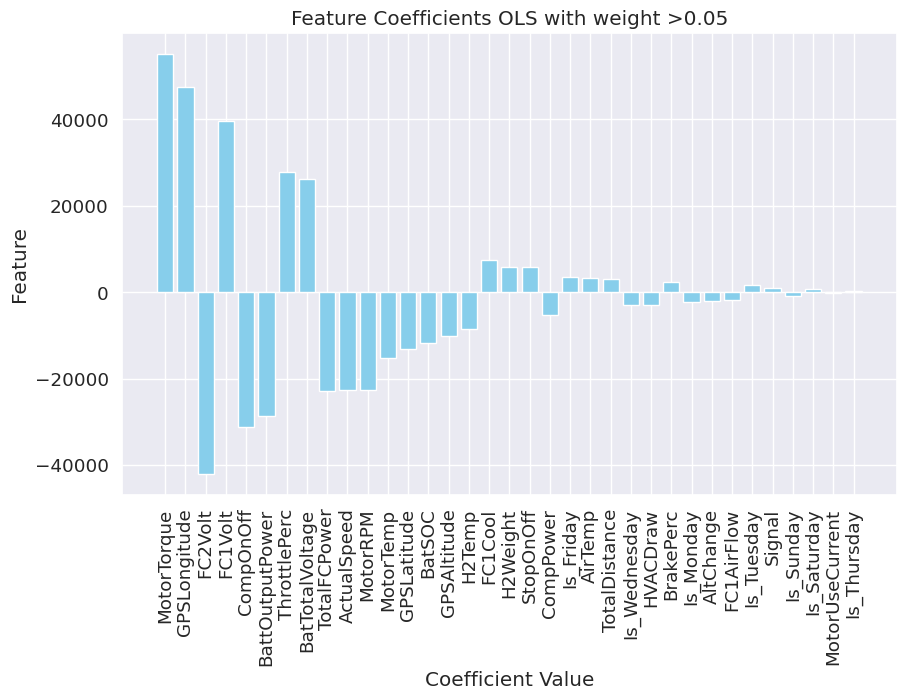

                         Feature   Coefficient
MotorTorque          MotorTorque  55121.274068
GPSLongitude        GPSLongitude  47508.499440
FC2Volt                  FC2Volt -42061.986876
FC1Volt                  FC1Volt  39577.219773
CompOnOff              CompOnOff -31250.598585
BattOutputPower  BattOutputPower -28732.726867
ThrottlePerc        ThrottlePerc  27745.851062
BatTotalVoltage  BatTotalVoltage  26238.008010
TotalFCPower        TotalFCPower -22794.795692
ActualSpeed          ActualSpeed -22623.159835
MotorRPM                MotorRPM -22623.159835
MotorTemp              MotorTemp -15201.455884
GPSLatitude          GPSLatitude -13171.069140
BatSOC                    BatSOC -11800.632114
GPSAltitude          GPSAltitude -10105.702570
H2Temp                    H2Temp  -8454.822056
FC1Cool                  FC1Cool   7387.007638
H2Weight                H2Weight   5843.161444
StopOnOff              StopOnOff   5768.301583
CompPower              CompPower  -5287.566184
Is_Friday    

In [ ]:
#OLS to estimate coefficients of a Linear model

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are predefined
# Also assuming feature_names is a list of the feature names
feature_names = X_train.columns.tolist()

# Step 1: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

# Step 2: Fitting the OLS model
X_train_scaled_with_const = sm.add_constant(X_train_scaled_df)
model = sm.OLS(y_train, X_train_scaled_with_const).fit()

# Step 3: Testing the model
X_test_scaled_with_const = sm.add_constant(X_test_scaled_df)
y_pred = model.predict(X_test_scaled_with_const)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Step 4: Extracting and sorting coefficients by absolute value
coef_df = pd.DataFrame({
    'Feature': X_train_scaled_with_const.columns,
    'Coefficient': model.params
})
filtered_coef_df = coef_df[coef_df['Feature'] != 'const']  # Exclude the constant term
filtered_coef_df = filtered_coef_df[np.abs(filtered_coef_df['Coefficient']) > 0.05]
sorted_coef_df = filtered_coef_df.reindex(filtered_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Step 5: Visualizing the coefficients
plt.figure(figsize=(10, 6))
plt.bar(sorted_coef_df['Feature'], sorted_coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients OLS with weight >0.05')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()

# Display the results
print(sorted_coef_df)
print("\nMean Squared Error on Test Set:", mse)
print("Mean Absolute Error on Test Set:", mae)


print(model.summary())



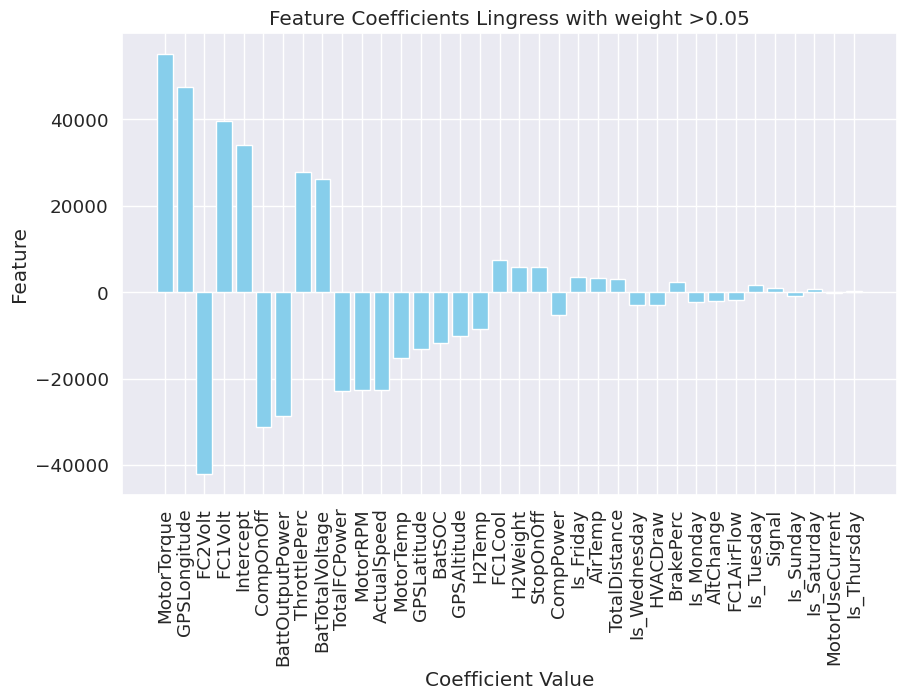

            Feature   Coefficient       P-value
21      MotorTorque  55121.274068  0.000000e+00
16     GPSLongitude  47508.499440  5.263123e-12
10          FC2Volt -42061.986876  2.460328e-02
13          FC1Volt  39577.219773  3.592334e-02
0         Intercept  34034.591833  0.000000e+00
3         CompOnOff -31250.598585  1.062435e-01
24  BattOutputPower -28732.726867  1.453881e-01
5      ThrottlePerc  27745.851062  1.464434e-08
2   BatTotalVoltage  26238.008010  1.118736e-04
25     TotalFCPower -22794.795692  3.770087e-02
20         MotorRPM -22623.159835  1.000000e+00
26      ActualSpeed -22623.159835  1.000000e+00
23        MotorTemp -15201.455884  5.832465e-03
15      GPSLatitude -13171.069140  6.859094e-02
1            BatSOC -11800.632114  4.436903e-02
14      GPSAltitude -10105.702570  3.644160e-03
17           H2Temp  -8454.822056  7.211214e-02
12          FC1Cool   7387.007638  1.683114e-01
18         H2Weight   5843.161444  1.074863e-01
4         StopOnOff   5768.301583  7.659

In [ ]:
#
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

feature_names = X_train.columns.tolist()

# Step 1: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

# Step 2: Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled_df, y_train)

# Step 3: Testing the model
y_pred = model.predict(X_test_scaled_df)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = model.score(X_test_scaled_df, y_test)

# Step 4: Extracting coefficients and calculating p-values
n = len(y_train)
p = X_train_scaled_df.shape[1]
df = n - p - 1

X_train_scaled_with_const = np.column_stack((np.ones((X_train_scaled_df.shape[0], 1)), X_train_scaled_df))
X_test_scaled_with_const = np.column_stack((np.ones((X_test_scaled_df.shape[0], 1)), X_test_scaled_df))

params = np.append(model.intercept_, model.coef_)
predictions = np.dot(X_train_scaled_with_const, params)

residuals = y_train - predictions
RSS = np.sum(residuals**2)
RSE = np.sqrt(RSS / df)

var_b = RSE**2 * (np.linalg.inv(np.dot(X_train_scaled_with_const.T, X_train_scaled_with_const)).diagonal())
std_err = np.sqrt(var_b)
t_stats = params / std_err
p_values = [2 * (1 - stats.t.cdf(np.abs(i), df)) for i in t_stats]

# Step 5: Creating DataFrame for coefficients, p-values, and sorting them
coef_df = pd.DataFrame({
    'Feature': ['Intercept'] + feature_names,
    'Coefficient': params,
    'P-value': p_values
})
filtered_coef_df = coef_df[np.abs(coef_df['Coefficient']) > 0.05]
sorted_coef_df = filtered_coef_df.reindex(filtered_coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Step 6: Visualizing the coefficients
plt.figure(figsize=(10, 6))
plt.bar(sorted_coef_df['Feature'], sorted_coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients Lingress with weight >0.05')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()

# Display the results
print(sorted_coef_df)
print("\nMean Squared Error on Test Set:", mse)
print("Mean Absolute Error on Test Set:", mae)
print("R-squared on Test Set:", r_squared)



In [ ]:
#Check num of rows , colums and type in the X_Scaled set and y set
print(X_train_scaled.shape)
print(type(X_train_scaled))
print(y.shape)
print(type(y))

(136908, 35)
<class 'numpy.ndarray'>
(171135,)
<class 'pandas.core.series.Series'>


In [ ]:
#Check that X_scaled is scaled 
print(X_train_scaled)
#X is scaled
y
print(y)
#y is not scaled


[[-0.8329244  -0.12576665 -1.01801362 ... -0.51064259 -0.49589253
  -0.24951523]
 [-1.00668152 -0.247056   -1.01801362 ... -0.51064259  2.01656599
   0.76176558]
 [-0.48541016 -0.12697718 -1.01801362 ...  1.95831687 -0.49589253
   0.3133107 ]
 ...
 [-0.42749111 -0.13867899 -1.01801362 ... -0.51064259 -0.49589253
   0.05561754]
 [ 1.25216106  0.45574371  0.98230513 ... -0.51064259 -0.49589253
   0.75574605]
 [-1.10224794 -0.42153984 -1.01801362 ... -0.51064259 -0.49589253
   0.0514612 ]]
23         203685.667713
24          10301.466510
25          21699.800220
26           3245.146974
27          26002.304629
               ...      
1086232     27022.244447
1086233    -15413.267768
1086234     24648.455314
1086235     21390.241732
1086237     90882.136676
Name: EEM, Length: 171135, dtype: float64


END OF LINREGRESS AND OLS

In [ ]:
#check which format the dataset is
print(type(X_train_scaled))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
#check which format the dataset is
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


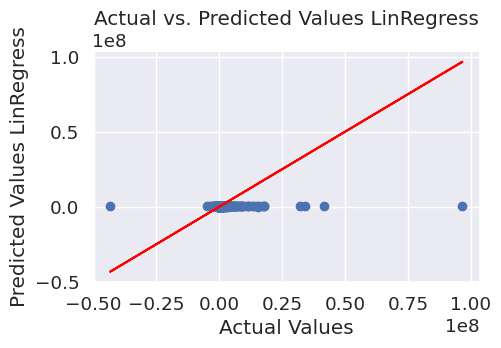

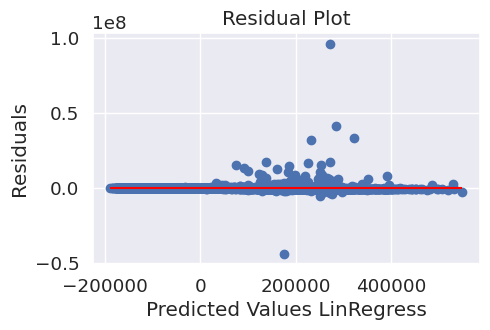

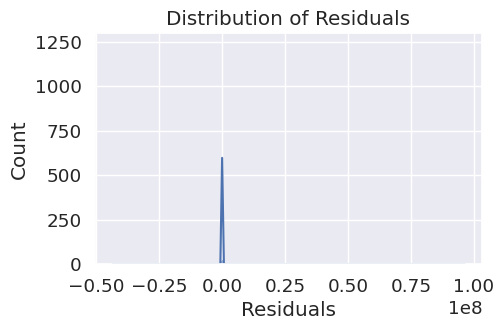

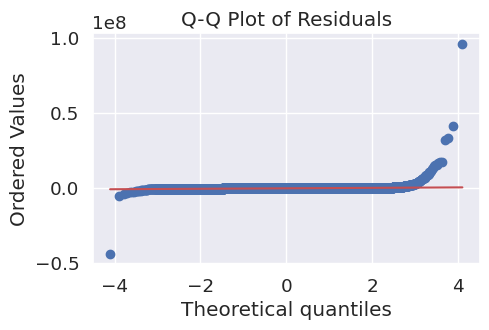

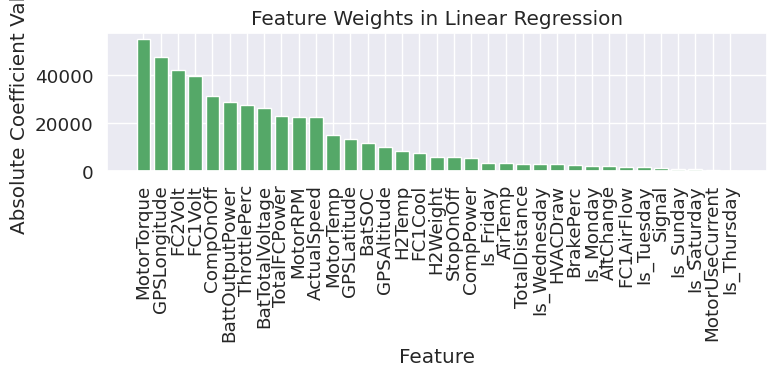

In [ ]:
# residuals, predict vs actuals, qq plots for LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression



# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting values for the testing set
y_pred = model.predict(X_test_scaled)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Ideal line where predicted values equal actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values LinRegress')
plt.title('Actual vs. Predicted Values LinRegress')
plt.show()

# Calculating residuals
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(5, 3))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red')
plt.xlabel('Predicted Values LinRegress')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(5, 3))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q Plot of Residuals
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Assuming 'model' is your trained LinearRegression instance and 'X_train' is your feature DataFrame
coefficients = model.coef_

# Getting absolute values of coefficients to somewhat mimic "importance"
absolute_coefficients = np.abs(coefficients)

# Sorting indices of coefficients by their absolute values in descending order
indices = np.argsort(absolute_coefficients)[::-1]

# Plotting the coefficients (mimicking feature importances)
plt.figure(figsize=(8, 4))
sorted_feature_names = np.array(X_train.columns)[indices]
plt.title('Feature Weights in Linear Regression')
plt.bar(range(X_train.shape[1]), absolute_coefficients[indices], color='g', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()



In [ ]:
#Run the model on a selection of the data


def predict_EEM(df, model):
    """
    Applies a trained Linear Regression model to predict 'EEM' on a new dataset.

    Parameters:
 df_hourly_numeric (DataFrame or ndarray): The original dataset containing the independent variables.
    model (LinearRegression): The trained Linear Regression model.

    Returns:
    ndarray: Predicted values for 'TotalPowerDraw'.
    """

    # Check if orig_data is a DataFrame or ndarray and select features accordingly
    if isinstance(df, pd.DataFrame):
        # If orig_data is a DataFrame, ensure it contains the same features as X_train
        features = df[X_train_scaled.columns] if 'X_train_scaled' in globals() or 'X_train_scaled' in locals() else df
    elif isinstance(df, np.ndarray):
        # If orig_data is an ndarray, assume it's already structured correctly
        features = df
    else:
        raise ValueError("orig_data must be a pandas DataFrame or a numpy ndarray.")

    # Use the model to make predictions on the provided features
    predictions = model.predict(features)

    return predictions

# Example usage:
# predictions = predict_EMM(orig_data, model)


APPLY THE MODEL ON THE ORIGINAL DATASET

In [ ]:
#Apply the LinRegress model on the original data 

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_EEM'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


TypeError: 'int' object is not subscriptable

In [ ]:
#Apply the LinRegress model on the original data 

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns 

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = model.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_EEM'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_EEM']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere


ValueError: shapes (171135,41) and (42,) not aligned: 41 (dim 1) != 42 (dim 0)

In [ ]:
selected_columns_EEM = df_with_predictions[['datetime', 'EEM', 'Predicted_EEM']]

In [ ]:
selected_columns_EEM

,datetime,EEM,Predicted_EEM
23,2022-08-01 04:08:09.900,203685.667713,-9.949968e+09
24,2022-08-01 04:08:19.880,10301.466510,-1.014314e+10
25,2022-08-01 04:08:29.870,21699.800220,-1.211363e+10
26,2022-08-01 04:08:39.850,3245.146974,-1.036024e+10
27,2022-08-01 04:08:49.860,26002.304629,-1.860038e+10
...,...,...,...
1086232,2023-08-01 11:16:09.940,27022.244447,-1.219088e+10
1086233,2023-08-01 11:16:19.930,-15413.267768,-1.117301e+10
1086234,2023-08-01 11:16:29.880,24648.455314,-1.306939e+10
1086235,2023-08-01 11:16:39.830,21390.241732,-1.271418e+10


RANDOMFOREST

In [ ]:
#find the best hyperparamters for 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500]  # You can adjust this list based on your computational budget
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print the best number of trees
print("Best number of trees (n_estimators):", best_rf.n_estimators)

# Optionally, evaluate its performance on the test set
predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Test MSE for the best model:", mse)
print("Test MAE for the best model:", mse)

In [ ]:
#Run RandomForestRegressor with Best number of trees (n_estimators): 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# X_scaled, y, X_train, y_train, X_test, and y_test are already defined

# Create the RandomForestRegressor object
# n_estimators is the number of trees in the forest, you can adjust this and other parameters as needed
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_train_pred = random_forest_regressor.predict(X_train)
y_test_pred = random_forest_regressor.predict(X_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print(f"Training MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")
print(f"Training MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Training R^2: {train_r2:.3f}")
print(f"Test R^2: {test_r2:.3f}")

# Feature Importance
feature_importances = random_forest_regressor.feature_importances_
# Assuming you want to print feature importance
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.3f}")

Training MSE: 185402972108.023
Test MSE: 575884997064.808
Training R^2: 0.841
Test R^2: -0.027
Feature Importances:
Feature 0: 0.045
Feature 1: 0.077
Feature 2: 0.013
Feature 3: 0.006
Feature 4: 0.052
Feature 5: 0.078
Feature 6: 0.003
Feature 7: 0.017
Feature 8: 0.012
Feature 9: 0.012
Feature 10: 0.002
Feature 11: 0.014
Feature 12: 0.006
Feature 13: 0.028
Feature 14: 0.068
Feature 15: 0.027
Feature 16: 0.052
Feature 17: 0.023
Feature 18: 0.132
Feature 19: 0.024
Feature 20: 0.115
Feature 21: 0.017
Feature 22: 0.084
Feature 23: 0.019
Feature 24: 0.013
Feature 25: 0.016
Feature 26: 0.022
Feature 27: 0.003
Feature 28: 0.002
Feature 29: 0.001
Feature 30: 0.000
Feature 31: 0.008
Feature 32: 0.003
Feature 33: 0.001
Feature 34: 0.008


RF Training MSE: 185402972108.023
RF Test MSE: 575884997064.808
RF Training MAE: 22080.926
RF Test MAE: 55968.923
RF Training R^2: 0.841
RF Test R^2: -0.027


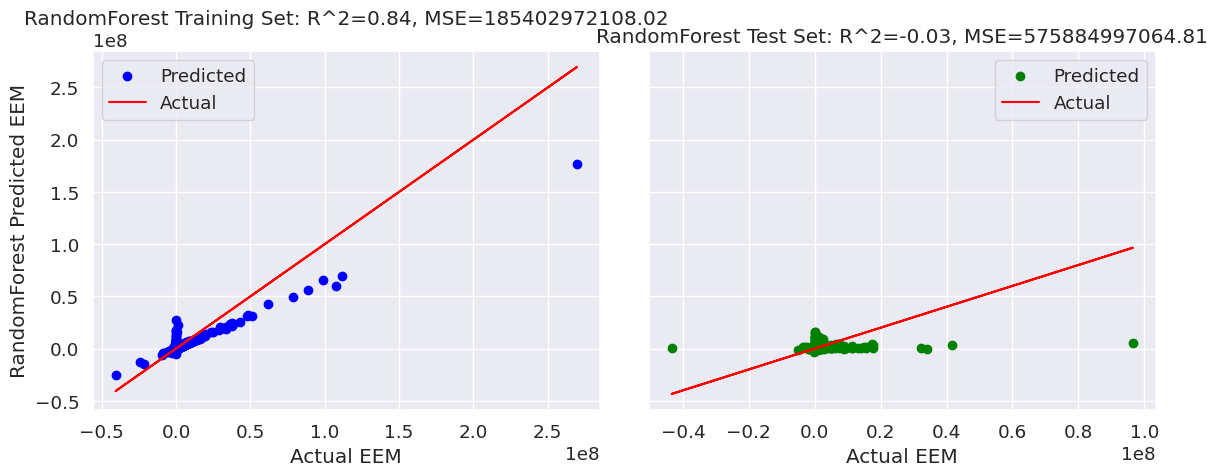

<Figure size 1000x600 with 0 Axes>

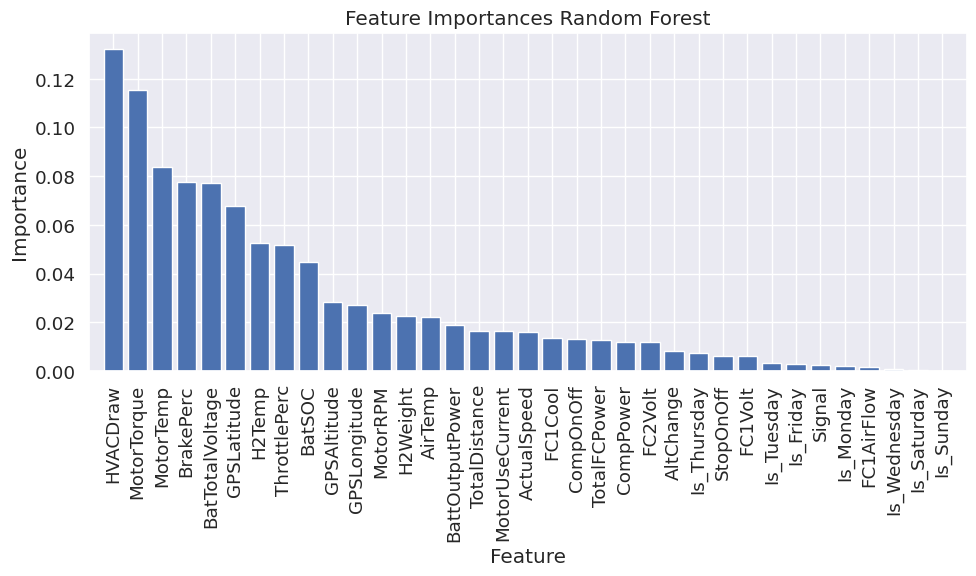

In [ ]:
#Random Forest for Regressions

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# defined y_train, y_train_pred, y_test, and y_test_pred from your model's predictions

# Calculate the performance metrics for the training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Calculate and print performance metrics
print(f"RF Training MSE: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RF Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RF Training MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"RF Test MAE: {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"RF Training R^2: {r2_score(y_train, y_train_pred):.3f}")
print(f"RF Test R^2: {r2_score(y_test, y_test_pred):.3f}")

# Plotting the Actual vs. Predicted values for both training and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Training set plot
ax[0].scatter(y_train, y_train_pred, color='blue', label='Predicted')
ax[0].plot(y_train, y_train, color='red', label='Actual')  # A line for perfect predictions
ax[0].set_title(f'RandomForest Training Set: R^2={train_r2:.2f}, MSE={train_mse:.2f}')
ax[0].set_xlabel('Actual EEM')
ax[0].set_ylabel('RandomForest Predicted EEM')
ax[0].legend()

# Test set plot
ax[1].scatter(y_test, y_test_pred, color='green', label='Predicted')
ax[1].plot(y_test, y_test, color='red', label='Actual')  # A line for perfect predictions
ax[1].set_title(f'RandomForest Test Set: R^2={test_r2:.2f}, MSE={test_mse:.2f}')
ax[1].set_xlabel('Actual EEM')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plotting feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# Get the feature names in the order of importance
sorted_feature_names = np.array(X_train.columns)[indices]

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Then, retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Now, let's plot the feature importances in descending order
plt.figure(figsize=(10, 6))
plt.title('Feature Importances Random Forest')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()  # This can help with fitting the labels
plt.show()


In [ ]:
#Apply the Random forest model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions

y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

In [ ]:
selected_columns_TPD = df_with_predictions[['datetime', 'TotalPowerDraw', 'Predicted_TotalPowerDraw']]

In [ ]:
# run the Random Forest Regressor on actual data and show the difference between actual and predicted
import pandas as pd

# Assuming 'df', 'model', 'X_train', and 'random_forest_regressor' are already defined

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new = df[feature_names]

# Drop the nans
X_new_cleaned = X_new.dropna()

# Making predictions
y_new_pred = random_forest_regressor.predict(X_new_cleaned)

# Insert predictions into the cleaned DataFrame
X_new_cleaned['Predicted_TotalPowerDraw'] = y_new_pred

# Merge the predictions back into the original DataFrame
df_with_predictions = df.merge(X_new_cleaned[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions['Percentage_Difference'] = (abs(df_with_predictions['TotalPowerDraw'] - df_with_predictions['Predicted_TotalPowerDraw']) / df_with_predictions['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions['Percentage_Difference'] = df_with_predictions['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with Random Forest')
print(df_with_predictions[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])

Predictions with Random Forest
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13235.850024               3.479873
1        9444.155245               8829.045440               6.513127
2       12075.898738              12238.030472               1.342606
3       40680.984837              39836.036324               2.077011
4        5412.054734               5263.085936               2.752537
...              ...                       ...                    ...
2645     5549.933717               4165.879798              24.938206
2648      602.394526                653.762508               8.527299
2650      689.177584                905.197192              31.344549
2659      266.421418                243.366256               8.653644
2661      876.396552                965.752973              10.195889

[954 rows x 3 columns]


GBM (Gradient Boosting Machine) , sequentally adds predictors (as in descision trees) whee every added feature corrects its predecessor, thereby imprving the models accuraty step by step.  
GBM iteratively reduce errors using multiple weak learners, making it highly effective for a wide range of problems, 

Training MSE: 392560470578.082
Test MSE: 584220182610.308
Training MAE: 52850.836
Test MAE: 59763.594
Training R^2: 0.664
Test R^2: -0.041


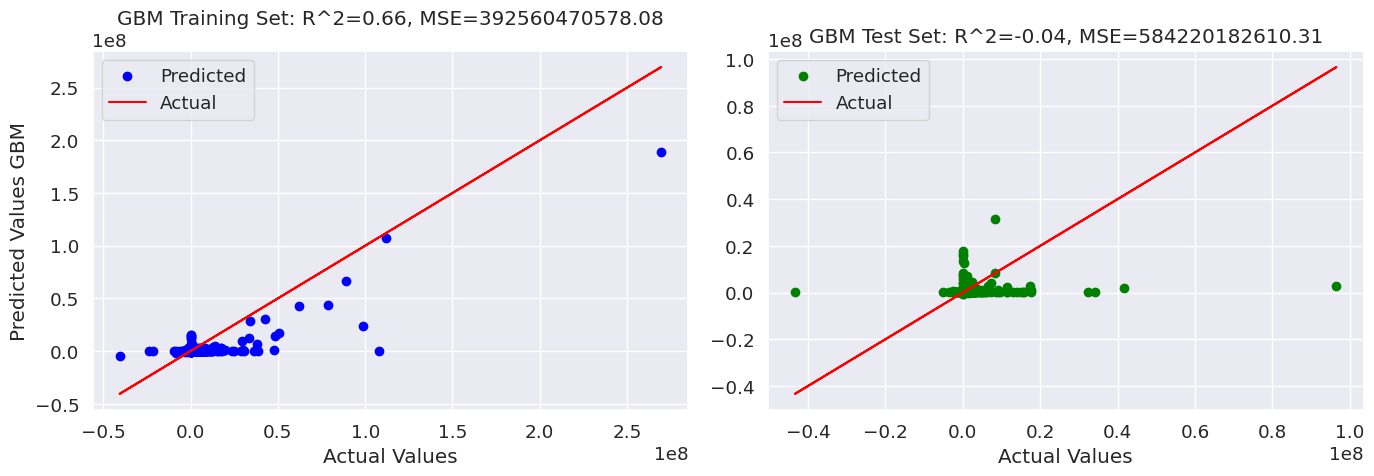

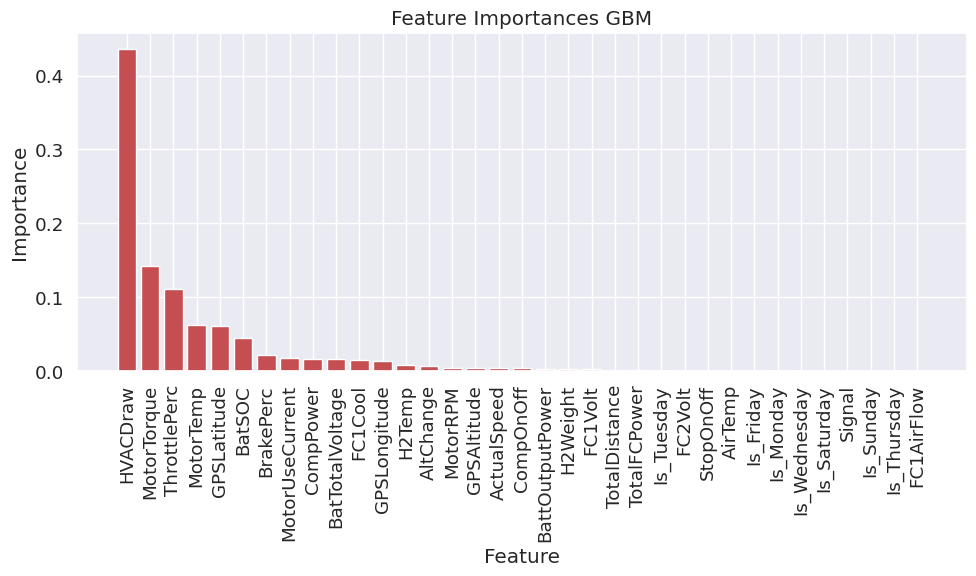

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and fit the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_regressor.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_gbm = gbm_regressor.predict(X_train)
y_test_pred_gbm = gbm_regressor.predict(X_test)

# Calculate and print performance metrics
train_mse_gbm = mean_squared_error(y_train, y_train_pred_gbm)
test_mse_gbm = mean_squared_error(y_test, y_test_pred_gbm)
train_mae_gbm = mean_absolute_error(y_train, y_train_pred_gbm)
test_mae_gbm = mean_absolute_error(y_test, y_test_pred_gbm)
train_r2_gbm = r2_score(y_train, y_train_pred_gbm)
test_r2_gbm = r2_score(y_test, y_test_pred_gbm)

print(f"Training MSE: {train_mse_gbm:.3f}")
print(f"Test MSE: {test_mse_gbm:.3f}")
print(f"Training MAE: {train_mae_gbm:.3f}")
print(f"Test MAE: {test_mae_gbm:.3f}")
print(f"Training R^2: {train_r2_gbm:.3f}")
print(f"Test R^2: {test_r2_gbm:.3f}")

# Plotting Actual vs Predicted values for both training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_train_pred_gbm, color='blue', label='Predicted')
axes[0].plot(y_train, y_train, color='red', label='Actual')  # Ideal line where predicted values equal actual values
axes[0].set_title(f'GBM Training Set: R^2={train_r2_gbm:.2f}, MSE={train_mse_gbm:.2f}')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values GBM')
axes[0].legend()

axes[1].scatter(y_test, y_test_pred_gbm, color='green', label='Predicted')
axes[1].plot(y_test, y_test, color='red', label='Actual')
axes[1].set_title(f'GBM Test Set: R^2={test_r2_gbm:.2f}, MSE={test_mse_gbm:.2f}')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

plt.tight_layout()
plt.show()

# Extracting feature importances
feature_importances_gbm = gbm_regressor.feature_importances_

# Sort the indices of feature importances in descending order
indices = np.argsort(feature_importances_gbm)[::-1]

# Retrieve the sorted feature names based on these indices
sorted_feature_names = X_train.columns[indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances GBM')
plt.bar(range(X_train.shape[1]), feature_importances_gbm[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [ ]:
#Apply the GBM model on the original data

import pandas as pd

# Assuming 'df', 'model', and 'X_train' are already defined


feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else ["BatSOC", "ThrottlePerc", "RearAxle1", "H2Weight", "MotorRPM", "MotorTemp", "BattOutputPower", "TotalFCPower",  "ActualSpeed", "AirTemp"]

# Selecting the relevant features from the new dataframe
X_new_gbm = df[feature_names]

# Drop the nans
X_new_cleaned_gbm = X_new_gbm.dropna()

# Making predictions

y_new_pred_gbm = gbm_regressor.predict(X_new_cleaned_gbm)

# Insert predictions into the cleaned DataFrame
X_new_cleaned_gbm['Predicted_TotalPowerDraw'] = y_new_pred_gbm

# If you want to merge the predictions back into the original DataFrame, use an identifier or index to merge on
# Assuming df_hourly_numeric and X_new_cleaned share a common index or identifier that survived the dropna
# For simplicity, if the index is maintained, you can reindex or merge based on the index

df_with_predictions_gbm = df.merge(X_new_cleaned_gbm[['Predicted_TotalPowerDraw']], how='left', left_index=True, right_index=True)

# Now df_hourly_numeric_with_predictions contains the original data plus a new column with predicted values where available, NaNs elsewhere

# Calculate the Percentage Difference
# Ensure 'TotalPowerDraw' is in df_with_predictions. If not, adjust the source DataFrame accordingly.
df_with_predictions_gbm['Percentage_Difference'] = (abs(df_with_predictions_gbm['TotalPowerDraw'] - df_with_predictions_gbm['Predicted_TotalPowerDraw']) / df_with_predictions_gbm['TotalPowerDraw']) * 100

# Optional: Handle cases where TotalPowerDraw is zero to avoid division by zero issues
df_with_predictions_gbm['Percentage_Difference'] = df_with_predictions_gbm['Percentage_Difference'].replace([np.inf, -np.inf], np.nan)

print('Predictions with GBM')
print(df_with_predictions_gbm[['TotalPowerDraw', 'Predicted_TotalPowerDraw', 'Percentage_Difference']])



Predictions with GBM
      TotalPowerDraw  Predicted_TotalPowerDraw  Percentage_Difference
0       13713.046695              13103.516211               4.444895
1        9444.155245               8630.468432               8.615771
2       12075.898738              12377.403153               2.496745
3       40680.984837              39793.925820               2.180525
4        5412.054734               5193.992592               4.029193
...              ...                       ...                    ...
2645     5549.933717               3413.326357              38.497890
2648      602.394526                522.301471              13.295781
2650      689.177584                586.588659              14.885703
2659      266.421418               -204.458799             176.742629
2661      876.396552                137.608524              84.298372

[954 rows x 3 columns]


CHECK FOR CLUSTERS

In [ ]:
#Check for clusters i the complete dataset via k-mean, f

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Assuming 'df' is your dataframe and it has already been loaded



# Step 1: Convert all datetime columns to numerical features
# Assuming 'datetime' is the datetime column in your dataframe. Replace 'datetime' with the actual column name if different.

datetime_columns = df.select_dtypes(include=[np.datetime64, 'datetime']).columns

for col in datetime_columns:
    df[col + '_Year'] = df[col].dt.year
    df[col + '_Month'] = df[col].dt.month
    df[col + '_Day'] = df[col].dt.day
    df[col + '_Hour'] = df[col].dt.hour
    df[col + '_Minute'] = df[col].dt.minute
    df[col + '_Second'] = df[col].dt.second

# Drop the original datetime columns
df = df.drop(columns=datetime_columns)

# Display the first few rows of the updated dataset
print("First few rows of the updated dataset after converting datetime columns:")
print(df.head())

# Step 2: Ensure all features are numeric
# Check if there are any non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns detected: {non_numeric_columns}")
    print("Please convert these columns to numeric or drop them before proceeding.")
else:
    # Step 3: Preprocess the data
    # Scale the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Step 4: Fit K-Means model
    # Choose the number of clusters (k)
    k = 3
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Get the cluster labels
    labels = kmeans.labels_

    # Add the cluster labels to the original dataframe
    df['Cluster'] = labels

    # Step 5: Visualize the clusters
    # Plot the clusters for the first two features
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
    plt.title('K-Means Clustering')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend(title='Cluster')
    plt.show()

    # Step 6: Optional - Evaluate the clustering performance
    # Calculate the within-cluster sum of squares (inertia)
    inertia = kmeans.inertia_
    print(f'Within-cluster sum of squares (Inertia): {inertia}')

    # Calculate silhouette score
    sil_score = silhouette_score(scaled_data, labels)
    print(f'Silhouette Score: {sil_score:.2f}')




In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.drop(columns=['Vdatetime', 'DayOfWeek'])



# Step 1: Preprocess the data
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Step 2: Fit K-Means model
# Choose the number of clusters (k)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df1['Cluster'] = labels

# Step 3: Visualize the clusters
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ActualSpeed', y='NetWeight', hue='Cluster', data=df1, palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('ActualSpeed')
plt.ylabel('NetWeight')
plt.legend(title='Cluster')
plt.show()

# Step 4: Optional - Evaluate the clustering performance
# Calculate the within-cluster sum of squares (inertia)
inertia = kmeans.inertia_
print(f'Within-cluster sum of squares (Inertia): {inertia}')

# Calculate silhouette score (requires sklearn version >= 0.20)
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {sil_score:.2f}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import silhouette_score





# Drop the original datetime columns and any other specified columns
#df1 = df.drop(['Vdatetime', 'DayOfWeek'])
df1=df

df1=df1.drop(columns=['Vdatetime', 'datetime', 'DayOfWeek'])

# Step 2: Ensure all features are numeric
# Check if there are any non-numeric columns
non_numeric_columns = df1.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns detected: {non_numeric_columns}")
    print("Please convert these columns to numeric or drop them before proceeding.")
else:
    # Step 3: Preprocess the data
    # Scale the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df1)

    # Step 4: Fit K-Means model
    # Choose the number of clusters (k)
    k = 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Get the cluster labels
    labels = kmeans.labels_

    # Add the cluster labels to the original dataframe
    df1['Cluster'] = labels


    # Step 5: Dimensionality reduction using PCA for visualization
    # Note: For the 3D plot, we'll keep the actual features instead of reducing dimensions
    df1['ActualSpeed'] = df1['ActualSpeed']  # Ensure the features exist
    df1['NetWeight'] = df1['NetWeight']
    df1['SpeedChange'] = df1['SpeedChange']

    # Visualize the clusters in 3D
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df1['ActualSpeed'], df1['NetWeight'], df1['SpeedChange'], c=df1['Cluster'], cmap='viridis', s=100, alpha=0.7)
    ax.set_title('K-Means Clustering as Hue')
    ax.set_xlabel('ActualSpeed')
    ax.set_ylabel('NetWeight')
    ax.set_zlabel('SpeedChange')
    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)
    plt.show()

    # Step 6: Optional - Evaluate the clustering performance
    # Calculate the within-cluster sum of squares (inertia)
    inertia = kmeans.inertia_
    print(f'Within-cluster sum of squares (Inertia): {inertia}')

    # Calculate silhouette score
    sil_score = silhouette_score(scaled_data, labels)
    print(f'Silhouette Score: {sil_score:.2f}')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# Assuming 'df' is your dataframe with 40 features
# Compute the correlation matrix
corr_matrix = df1.corr()

# Compute the distance matrix
distance_matrix = 1 - corr_matrix.abs()

# Apply hierarchical clustering
Z = linkage(squareform(distance_matrix), method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df1.columns, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()
